In [4]:
from sklearn.datasets import fetch_openml

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import os
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [7]:
fashion_mnist = fetch_openml(data_id=40996, cache=True, parser='auto')

In [8]:
X, y = fashion_mnist.data, fashion_mnist.target

In [9]:
def extract_hog_features(image):
    # Reshape the image to (28, 28)
    image_reshaped = image.values.reshape((28, 28))

    # Calculate HOG features
    hog_features, hog_image = hog(image_reshaped, visualize=True)

    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled


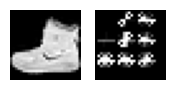

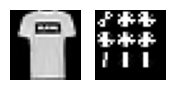

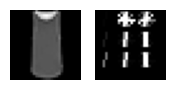

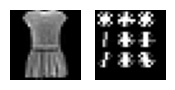

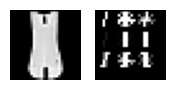

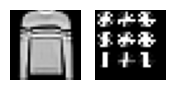

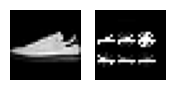

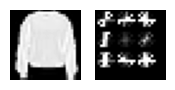

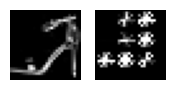

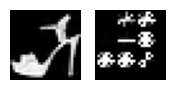

In [10]:
# Initialize an empty list to store HOG features
features_list = []

# Loop through each sample in the dataset
num_samples_to_display = 10

for i in range(len(X)):
    # Extract HOG features
    hog_features, hog_image = extract_hog_features(X.iloc[i])

    # Append HOG features to the features list
    features_list.append(hog_features)

    # Display the original image and the HOG features for the first 10 samples
    if i < num_samples_to_display:
        # Display the original image and the HOG features
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2, 2), sharex=True, sharey=True)

        ax1.axis('off')
        ax1.imshow(X.iloc[i].values.reshape(28, 28), cmap=plt.cm.gray)
        
        ax2.axis('off')
        ax2.imshow(hog_image, cmap=plt.cm.gray)
        
        plt.show()

# Convert the features list to a NumPy array
features_array = np.array(features_list)


In [11]:
# Convert the list to a NumPy array
features_array = np.array(features_list)

# Print the HOG features for all samples
print(features_array)

[[0.         0.         0.         ... 0.03366572 0.03303958 0.0462374 ]
 [0.2303257  0.1379896  0.20126778 ... 0.00455071 0.0083015  0.237459  ]
 [0.00487256 0.         0.         ... 0.00172271 0.0505074  0.28417499]
 ...
 [0.00233757 0.00116155 0.         ... 0.0020304  0.07239346 0.24108798]
 [0.         0.         0.         ... 0.         0.0145459  0.13388452]
 [0.00065133 0.         0.         ... 0.02140746 0.11879873 0.02346832]]


In [12]:
#apply k means algorithm
from sklearn.cluster import KMeans

In [13]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  # Explicitly set n_init
kmeans.fit(features_array)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [23]:
print(kmeans.cluster_centers_.shape)

(5, 81)


In [24]:
print(kmeans.cluster_centers_[i].shape)

(81,)


In [27]:
center_image = kmeans.cluster_centers_[i].reshape((9, 9))

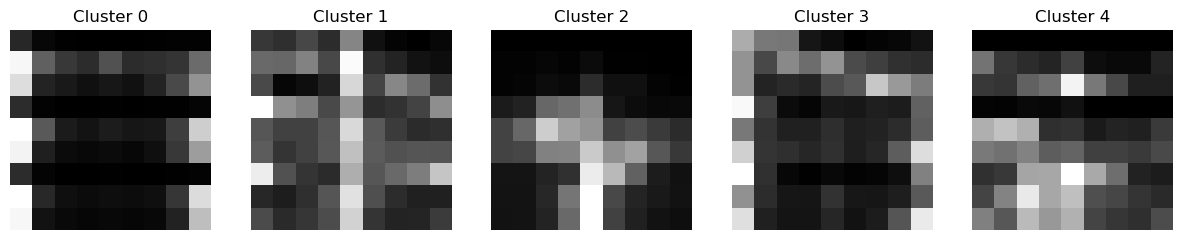

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize the cluster centers (representative images)
fig, ax = plt.subplots(1, n_clusters, figsize=(15, 3))

for i in range(n_clusters):
    center_image = kmeans.cluster_centers_[i].reshape((9, 9))
    ax[i].imshow(center_image, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'Cluster {i}')

plt.show()


In [30]:
from sklearn.metrics import silhouette_score

# Get the cluster labels
cluster_labels = kmeans.labels_

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(features_array, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.20962695844898468


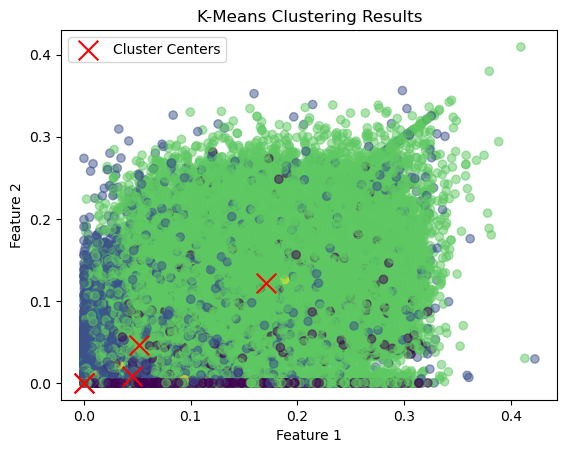

In [33]:
import matplotlib.pyplot as plt
# Predict cluster labels for each sample
predicted_labels = kmeans.predict(features_array)

# Visualize the clustered data
plt.scatter(features_array[:, 0], features_array[:, 1], c=predicted_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
